<a href="https://colab.research.google.com/github/Herrera00/CIENCIA-DATOS-2025/blob/main/Trabajo_en_clase_1_(27_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

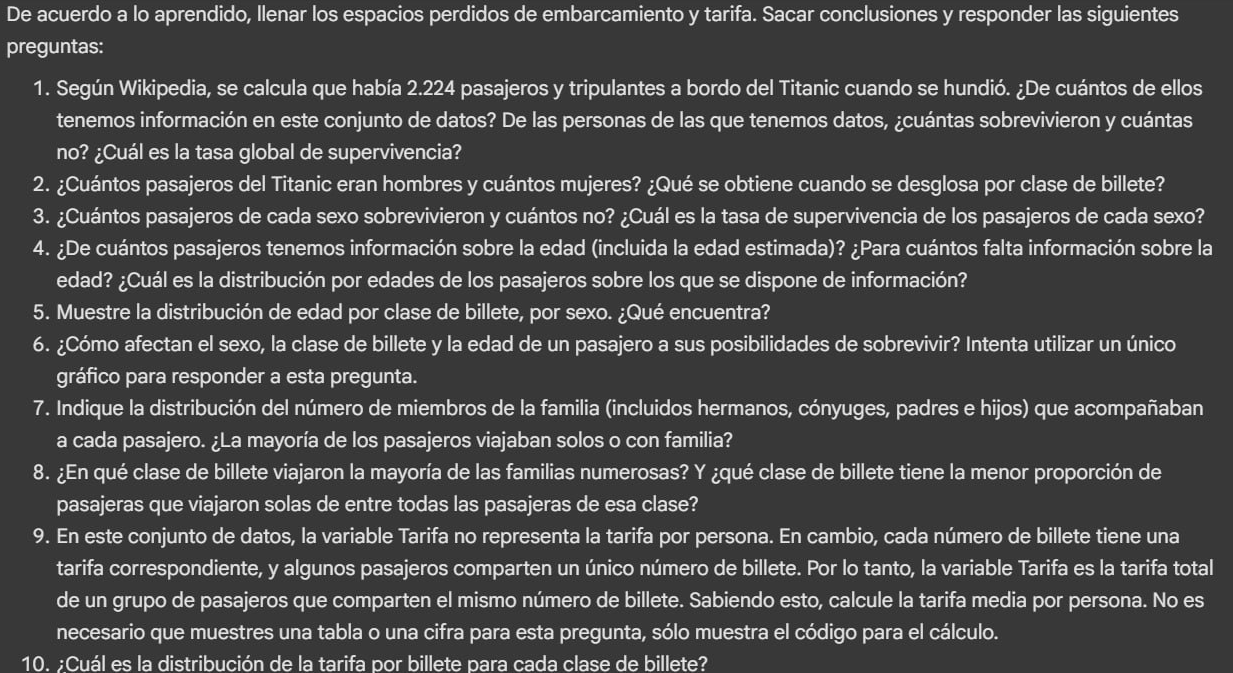

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv ("https://raw.githubusercontent.com/nt246/NTRES-6100-data-science/master/datasets/Titanic.csv")

In [40]:
# 1. Contar cuántos registros (personas) hay en el conjunto de datos
total_personas= df.shape[0]

# Contar cuántos sobrevivieron (Survived = 1) y cuántos no (Survived = 0)
supervivientes = df['Survived'].sum()
no_supervivientes = total_personas_dataset - supervivientes

# Calcular la tasa global de supervivencia
tasa_supervivencia_global = df['Survived'].mean()

print(f"Total de personas con información: {total_personas}")
print(f"Personas que sobrevivieron: {supervivientes}")
print(f"Personas que no sobrevivieron: {no_supervivientes}")
print(f"Tasa global de supervivencia: {tasa_supervivencia_global:.4f} ({tasa_supervivencia_global*100:.2f}%)")

Total de personas con información: 891
Personas que sobrevivieron: 342
Personas que no sobrevivieron: 549
Tasa global de supervivencia: 0.3838 (38.38%)


#**1.**

#**- Tenemos informacion de 891 personas de las cuales 342 sobrevivieron y 549 murieron. La tasa global de supervivencia es de 38.38%**

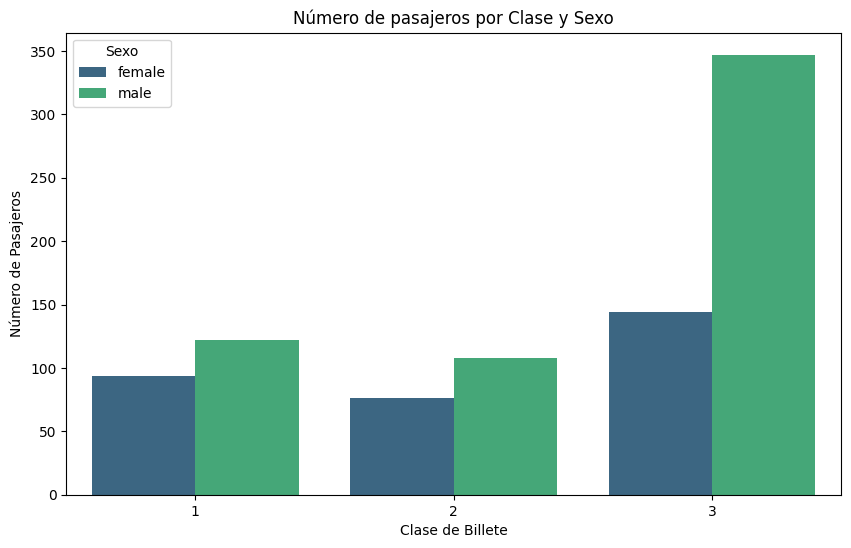

In [57]:
# 2. Distribución por Sexo
conteo_sexo = df['Sex'].value_counts()

# Distribución por Sexo y Clase de Billete (Pclass)
conteo_sexo_clase = df.groupby(['Pclass', 'Sex']).size().unstack(fill_value=0)


# Gráfico de desglose por clase y sexo
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Pclass', hue='Sex', palette='viridis')
plt.title('Número de pasajeros por Clase y Sexo')
plt.xlabel('Clase de Billete')
plt.ylabel('Número de Pasajeros')
plt.legend(title='Sexo')
plt.show()

#**2.**

#**- De las 891 personas con las que contamos registros 577 eran hombres y 314 mujeres. Pero si desglosamos por clase de billete encontramos:**

#**Clase1= 94(M) y 122(H)**

#**Clase2= 76(M) y 108(H)**

#**Clase3= 144(M) y 347(H)**


--- Supervivencia por Sexo ---
        Sobrevivieron  Total Tasa de Supervivencia
Sex                                               
female            233    314                0.7420
male              109    577                0.1889


/tmp/ipython-input-3337250655.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(supervivencia_sexo.applymap(lambda x: f'{x:.4f}' if isinstance(x, float) else x))
/tmp/ipython-input-3337250655.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')


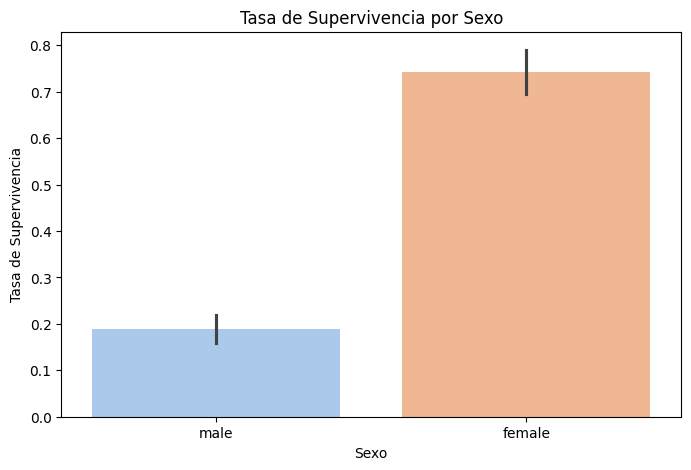

In [62]:
# 3. Supervivencia por Sexo
supervivencia_sexo = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
supervivencia_sexo.columns = ['Sobrevivieron', 'Total', 'Tasa de Supervivencia']

print("\n--- Supervivencia por Sexo ---")
print(supervivencia_sexo.applymap(lambda x: f'{x:.4f}' if isinstance(x, float) else x))

# Gráfico de tasa de supervivencia por sexo
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Sex', y='Survived', palette='pastel')
plt.title('Tasa de Supervivencia por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Tasa de Supervivencia')
plt.show()

#**3.**

#**-HOMBRES: De los 577 hombres registrados 109 sobrevivieron lo que nos da una tasa de supervivencia del 18.89%**
#**-MUJERES: De las 314 mujeres sobrevivieron 233 lo que nos da una tasa de supervivencia del 87.2%**

In [85]:
def extract_title(data):
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)
  return titles

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-4157432162.py:2: SyntaxWarning: invalid escape sequence '\.'
  titles=data["Name"].str.extract("([A-Za-z]+)\.", expand=True)


In [87]:
df["Title"]=extract_title(df)

In [88]:
df["Title"].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [89]:
def replace_titles(data):
  title_mapping={"Mr":0,"Miss":1,"Mrs":2}
  data ["Title"]=data["Title"].map(title_mapping).fillna(3)
  return data

In [90]:
replace_titles(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,3.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.0
